In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load Boston Housing from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)

X = boston.data
y = boston.target

data = pd.concat([X, y.rename("MEDV")], axis=1)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


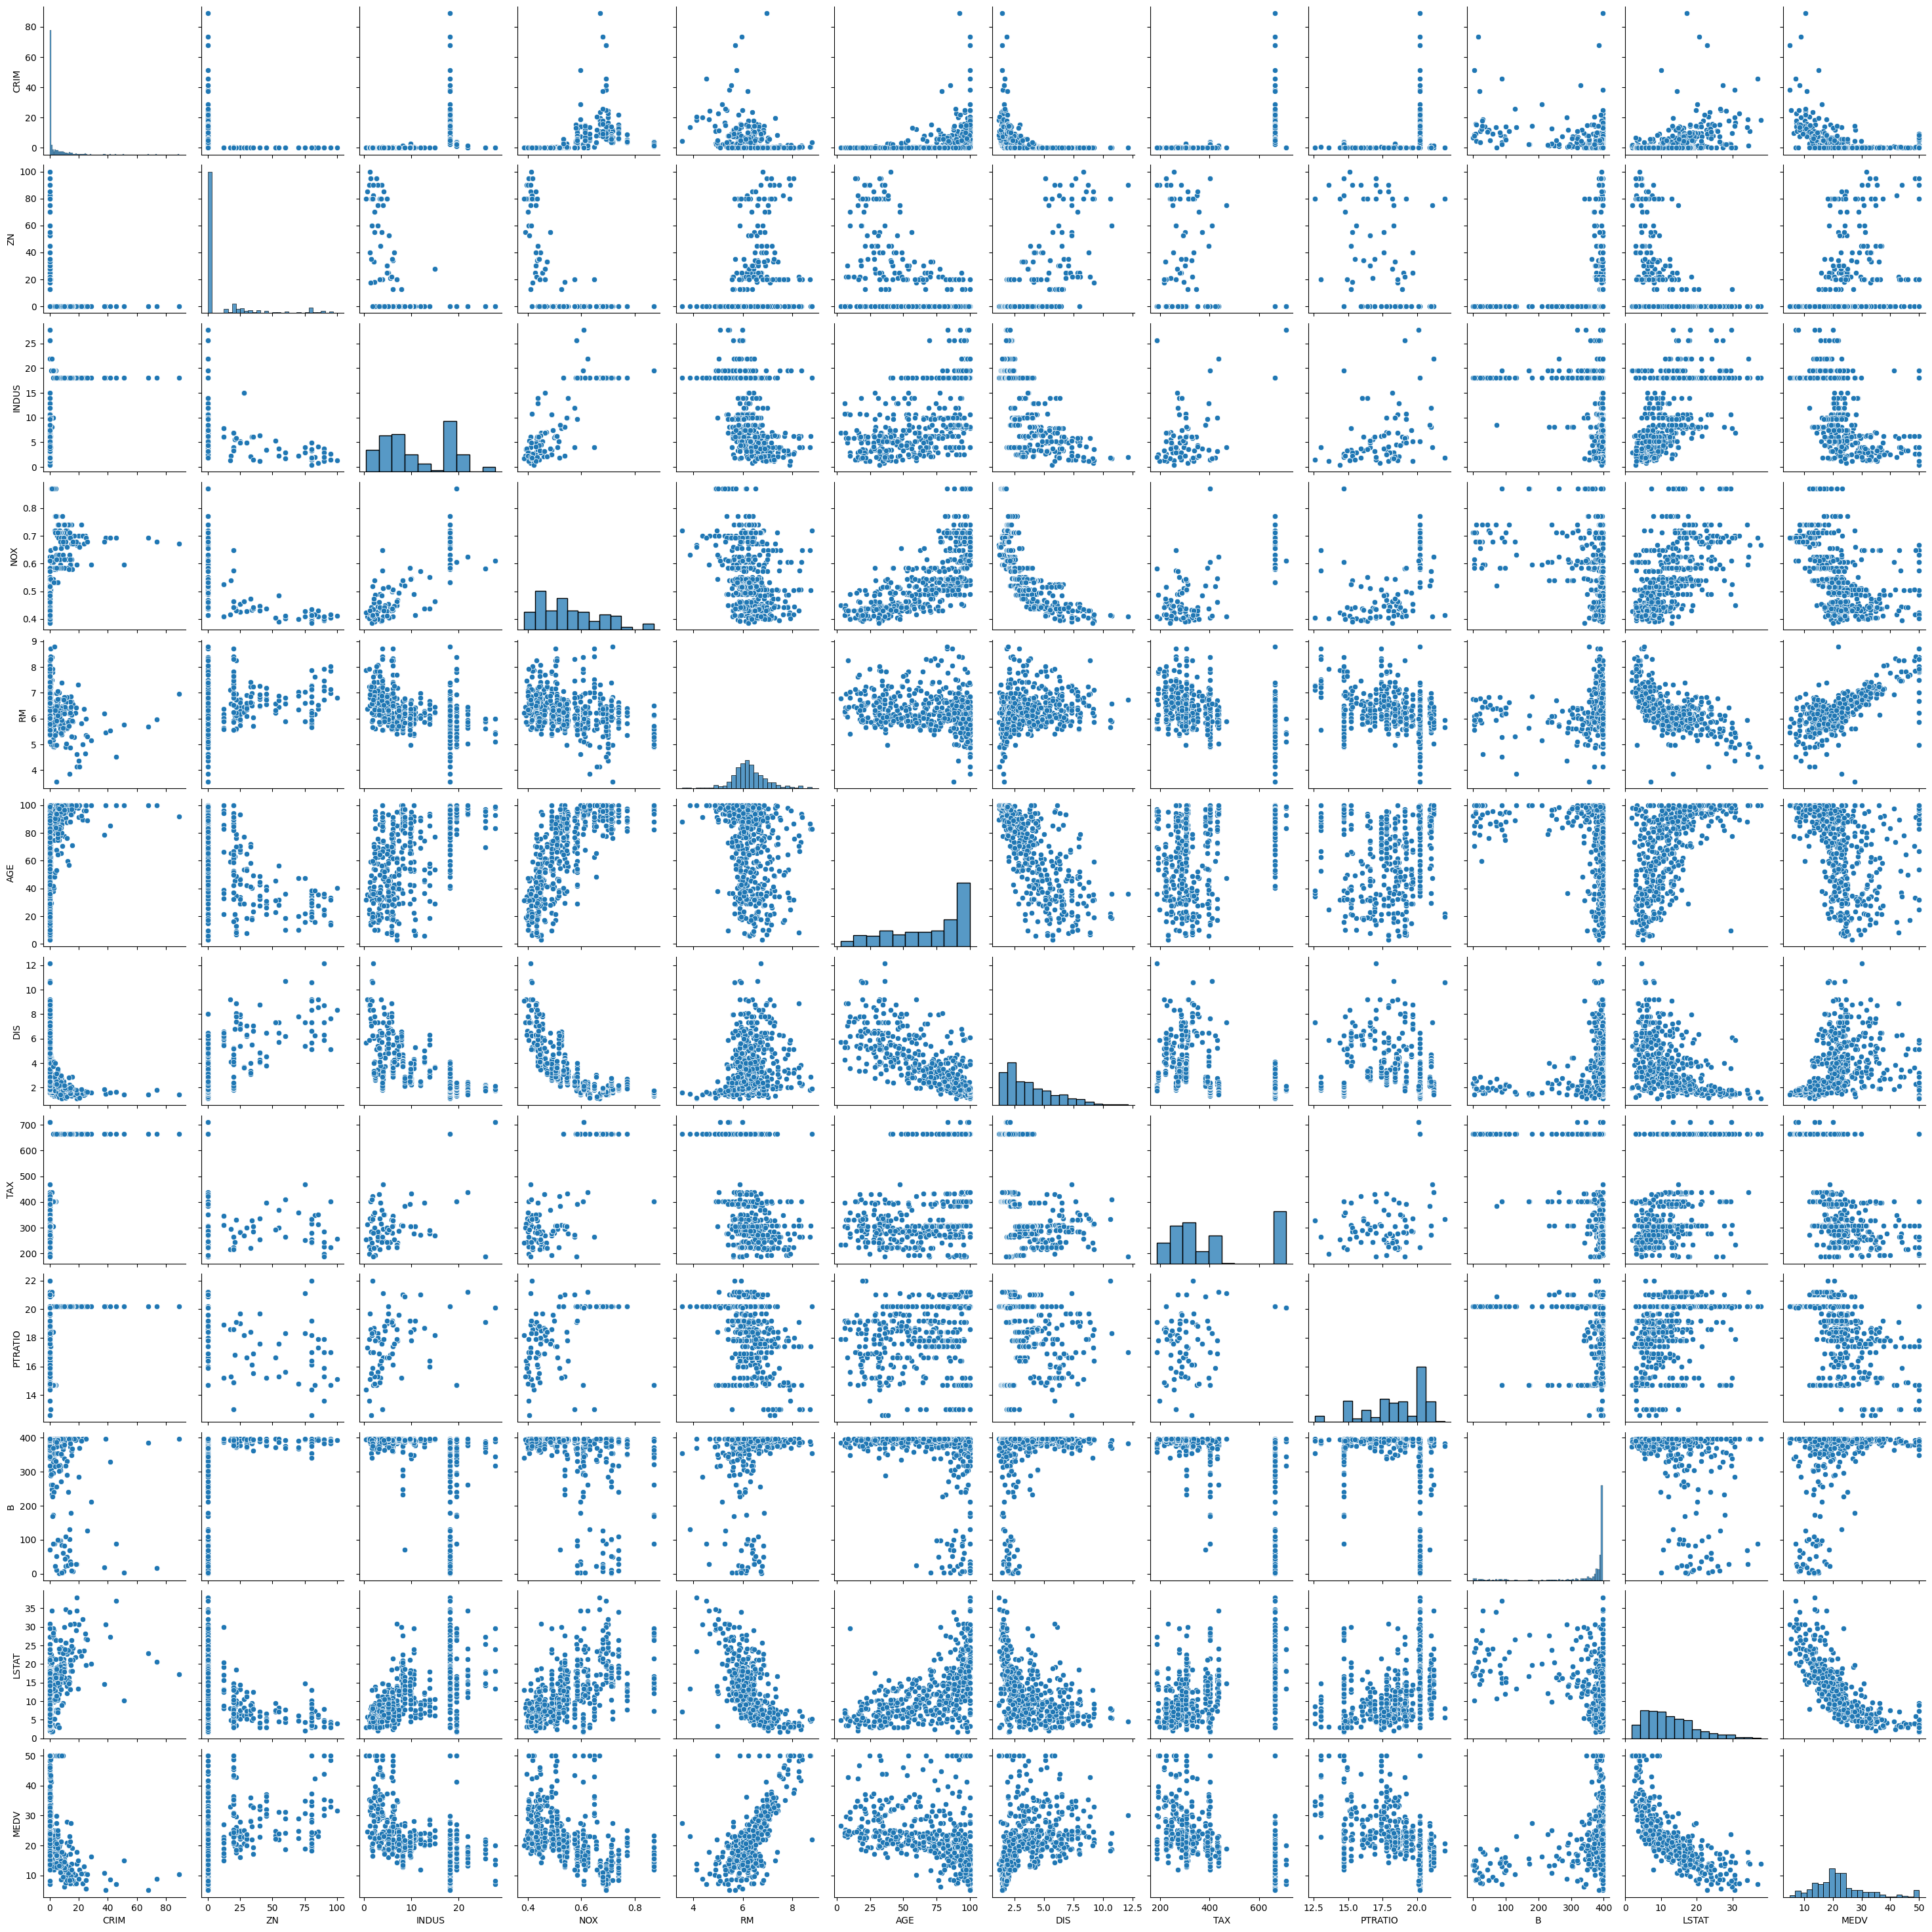

In [ ]:
sns.pairplot(data)

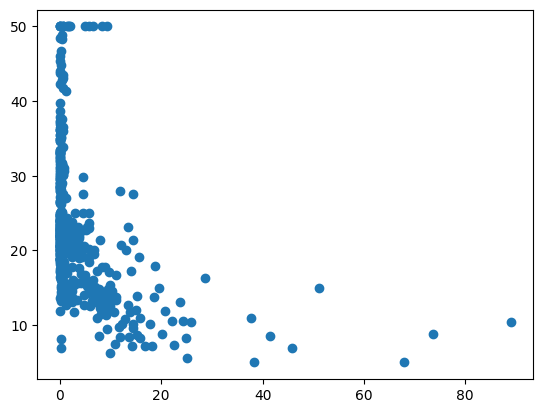

In [ ]:
plt.scatter(data['CRIM'],data['MEDV'])

<Axes: xlabel='CRIM', ylabel='MEDV'>

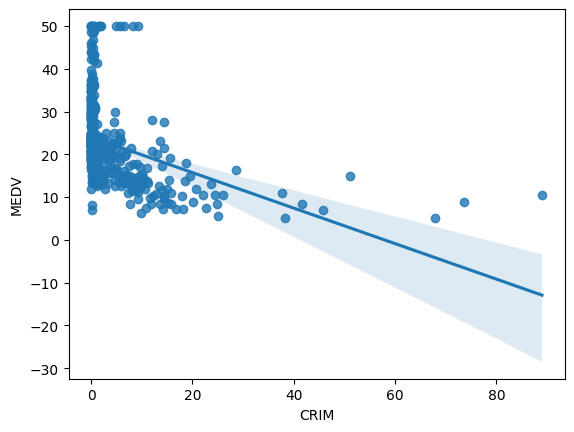

In [ ]:
sns.regplot(x='CRIM',y='MEDV',data=data)


selecting dependent and independent featutres by slecting x and y values

In [ ]:
# Independent features
X = data.iloc[:, :-1]

# Dependent feature (target)
y = data.iloc[:, -1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (354, 13)
X_test: (152, 13)
y_train: (354,)
y_test: (152,)


standarisation of dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

#

In [ ]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [ ]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

TRAINING MODEL


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [ ]:
regression.intercept_

np.float64(23.01581920903955)

to know on which parameter model will be trained

In [ ]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

prediction with trained data



In [ ]:
reg_prediction=regression.predict( X_test)

PLOT THE SCATTER PLOT FOR PREDICTION

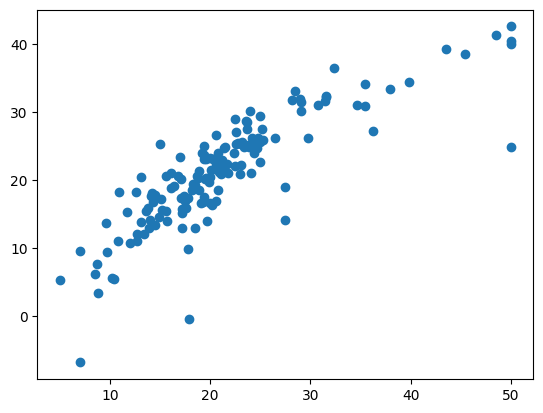

In [ ]:
plt.scatter(y_test,reg_prediction)
#

In [ ]:
residuals=y_test-reg_prediction # error in model
print(residuals)

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: MEDV, Length: 152, dtype: float64


/tmp/ipython-input-2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='MEDV', ylabel='Density'>

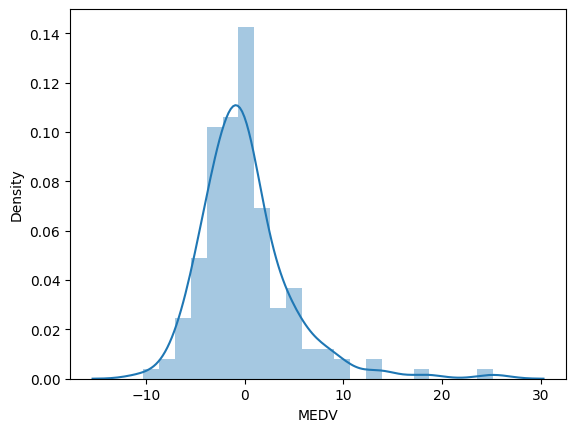

In [ ]:
sns.distplot(residuals)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_prediction))
print(mean_squared_error(y_test,reg_prediction))

3.1627098714574053
21.51744423117721


R SQUARE AND ADJUSTED R SQUARE

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,reg_prediction)
print(r2)

0.7112260057484932


In [ ]:
# TO DISPLAY ADJUSTED R SQUARE
adjusted_r2 = 1 - (1 - r2) * (y_test.shape[0] - 1) / (y_test.shape[0] -X_test.shape[1] - 1)
adjusted_r2

0.6840226584639308

new dataprediction


picking the model file for deployment

In [ ]:
#Pickling (Saving & Loading) a Machine Learning Model in Python 🧠💾

#Pickling means saving a trained ML model to disk so you can reuse it later without retraining.
import pickle




In [ ]:
# save model
with open("linear_reg_model.pkl", "wb") as file:
    pickle.dump(reg_model, file)

NameError: name 'reg_model' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [ ]:
import pickle

with open("linear_reg_model.pkl", "wb") as file:
    pickle.dump(regression, file)


In [ ]:
with open("linear_reg_model.pkl", "rb") as file:
    pickled_model = pickle.load(file)


In [ ]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

